In [1]:
from matplotlib import pyplot as plt
from matplotlib.ticker import EngFormatter
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib
import glob


%matplotlib inline

import matplotlib as mpl
mpl.rcParams.update({'font.size': 14,'font.family':'Arial','font.weight':'bold','figure.dpi':200})

from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
from IPython.display import display
from ipywidgets import *


def full(w,hideDes=False):
    for i in w.children:
        i.layout.width='100%'
        if hideDes:
            i.description = ''
    return w

def doIT(f,*args,**kwargs):
    display(full(interactive(f,*args,**kwargs)))

In [2]:
import SerialEquipment as se

In [3]:
lksr = se.Lakeshore('COM3')
BB   = se.CI_SR200('COM5')
smu  = se.Keithley2400('COM4',timeout=10)

In [4]:
print(lksr.getTemp(),BB.getTemp(),BB.isStable())

+106.00 600 1


In [ ]:
print(BB.setTemp(600))

In [ ]:
T = 600
BB.cmd('SETTEMPERATURE %d'%int(T))

In [5]:
smu.ask('*IDN?')

'KEITHLEY INSTRUMENTS INC.,MODEL 2401,4307558,A01 Aug 25 2011 12:57:43/A02  /V/M'

In [ ]:
#smu.IV_Sweep_Config(port='REAR',trg_delay=0)

In [6]:
def doSweep(strt=-1,stop=None,step=.01,**kwargs):
    strt=-1
    if stop is None:
        stop=-strt
    step=.01
    count=abs((strt-stop)//step)
    data = smu.IV_Sweep_Config(port='REAR',
                               step=step,start=strt,stop=stop,
                               trg_delay=0,count=count,PROT=1E-4)
    try:
        data = np.array(data.split(',')).astype(float)
        data = data.reshape((len(data)//2,2))
        plt.plot(data[:,0],data[:,1],'.')
        plt.title('$%0.2f \Omega$'%(data[0,0]/data[0,1]))
        plt.show()
    except:
        print('err',data.split(','))
    return data

In [ ]:
#dark2 = doSweep()

In [7]:
print(smu.errorDump())

[]


In [8]:
aps = BB.getApertureList()
print(aps)
aps = [i.split(':')[1] for i in aps.split(',')[1::2]]
print(aps)

T01,T1:PH 22.2mm,T02,T2:PH 15.9mm,T03,T3:PH 12.7mm,T04,T4:PH 9.5mm,T05,T5:PH 6.4mm,T06,T6:PH 3.2mm,T07,T7:PH 1.6mm,T08,T8:PH 0.8mm
['PH 22.2mm', 'PH 15.9mm', 'PH 12.7mm', 'PH 9.5mm', 'PH 6.4mm', 'PH 3.2mm', 'PH 1.6mm', 'PH 0.8mm']


In [ ]:
d = []
apList = (1,3,5,3,1)
for i in apList:
    BB.setAperture(i)
    d.append(doSweep())
    print(smu.errorDump())

In [ ]:
for IV,l in zip(d,apList):
    plt.semilogy(IV[:,0],abs(IV[:,1])/(100E-4)**2,label=aps[l-1])
plt.legend(loc='best',prop={'size':10})
plt.show()

In [ ]:
dark = doSweep()

In [ ]:
smu.errorDump()

In [ ]:
plt.semilogy(dark[:,0],abs(dark[:,1])/(100E-4)**2)

100.0


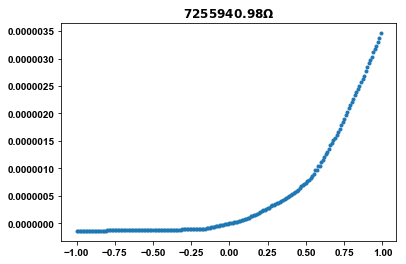

106.66666666666667


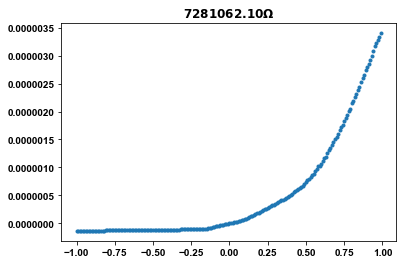

113.33333333333333


In [ ]:
Tdata = {}
for t in np.linspace(100,160,10):
    T = int(t)
    print(t)
    lksr.setTempAndWait(1,T,percent=.001)
    Tdata[T]=doSweep()
    smu.errorDump()

In [ ]:
import importlib as imp
imp.reload(se)


lksr = se.Lakeshore('COM3')
float(lksr.cmd('KRDG?'))

In [ ]:
import time
t1 = time.time()
print(lksr.setTempAndWait(1,104,percent=.001))
print(time.time()-t1)

In [ ]:
BB.setAperture(4)

In [ ]:
BB.setAperture(3)

In [ ]:
(100E-4)**2